In [5]:
import torch
import numpy as np
from utils import *

In [6]:
if torch.cuda.is_available():
  tensor = tensor.to('cuda')

In [7]:
def single_event_difference(i,phase=1.5):
    event = importpbdatanumpy(i).T
    phi = torch.tensor(event[2])
    eta = torch.tensor(event[1])
    deta = eta - eta.unsqueeze(-1)
    dphi = phi - phi.unsqueeze(-1)
    ids = torch.arange(0,len(phi))
    mask = torch.ones_like(dphi).scatter_(1,ids.unsqueeze(1),0.)
    dphi = dphi[mask.bool()]
    deta = deta[mask.bool()]
    pimask = (dphi > (torch.pi+phase))*(-1) + (dphi < (-torch.pi+phase))*1
    dphi += (pimask*2*torch.pi)
    result = torch.stack([dphi,deta],dim=1)
    return result

In [8]:
# event = importpbdatanumpy(0).T
# phi = torch.tensor(event[2])
# eta = torch.tensor(event[1])
# deta = eta - eta.unsqueeze(-1)
# dphi = phi - phi.unsqueeze(-1)
# ids = torch.arange(0,len(phi))
# mask = torch.ones_like(dphi).scatter_(1,ids.unsqueeze(1),0.)
# dphi = dphi[mask.bool()]
# deta = deta[mask.bool()]
# pimask = (dphi > torch.pi)*(-1) + (dphi < -torch.pi)*1
# dphi += pimask*2*torch.pi +1.5
# result = torch.stack([dphi,deta],dim=1)

In [9]:
def calculate_single_data(startidx, endidx, phase=1.5, bincount=30, save=False):
    rlist = []
    for i in range(startidx, endidx+1):
        rlist.append(single_event_difference(i,phase))
    result = torch.cat(rlist,dim=0)
    x_df = pd.DataFrame(result, columns=['phi','eta'])
    sx, sy, sz = surfacedatapro(x_df, bincount, bincount, torch.pi+phase, -torch.pi+phase, 5.5)
    sz = sz.T
    if save:
        filename = "single/"+str(bincount)+"x"+str(bincount)+"_"+str(startidx)+"to"+str(endidx)+".csv"
        np.savetxt(filename, sz, delimiter=",")
        np.savetxt('single/single_x_header.csv', sx, delimiter=",")
        np.savetxt('single/single_y_header.csv', sy, delimiter=",")
    sz/=(endidx-startidx)
    return sx, sy, sz

In [10]:
sx,sy,sz = calculate_single_data(0,10000,1.5,30)

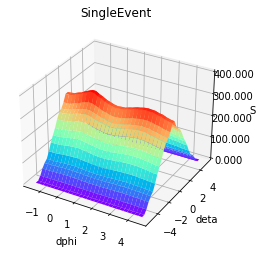

In [11]:
plot_3d_surface(sx, sy, sz, 400, "SingleEvent", "S", "SingleEvent.png")